In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Embedding, LSTM, Dense, Dot, Multiply, Flatten, Activation, Concatenate
from keras.models import Model, Sequential
from keras.layers import Layer
from keras import backend as K
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('/content/drive/MyDrive/PKL-JTK-Eben/FIX REC/movie.csv')

In [12]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
data['user'] = data['userId'].astype("category").cat.codes
data['movie'] = data['movieId'].astype("category").cat.codes

num_users = len(data['user'].unique())
num_movies = len(data['movie'].unique())
embedding_size = 100

In [13]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
# Model
user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_size)(movie_input)

user_lstm = LSTM(50)(user_embedding)
movie_lstm = LSTM(50)(movie_embedding)

user_attention = Flatten()(user_lstm)
movie_attention = Flatten()(movie_lstm)

user_dense = Dense(10, activation='relu')(user_attention)
movie_dense = Dense(10, activation='relu')(movie_attention)

combined = Concatenate()([user_dense, movie_dense])

output = Dense(1, activation='sigmoid')(combined)

In [25]:
model = Model(inputs=[user_input, movie_input], outputs=output)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Training
callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

history = model.fit([train['user'], train['movie']], train['rating'],
          validation_split=0.1, epochs=20, batch_size=64, callbacks=callbacks)

Epoch 1/20
355/355 [==============================] - 11s 16ms/step - loss: 8.0938 - val_loss: 7.6049
Epoch 2/20
355/355 [==============================] - 4s 10ms/step - loss: 7.6196 - val_loss: 7.6036
Epoch 3/20
355/355 [==============================] - 3s 9ms/step - loss: 7.6190 - val_loss: 7.6033
Epoch 4/20
355/355 [==============================] - 3s 9ms/step - loss: 7.6189 - val_loss: 7.6032
Epoch 5/20
355/355 [==============================] - 5s 15ms/step - loss: 7.6188 - val_loss: 7.6031
Epoch 6/20
355/355 [==============================] - 3s 10ms/step - loss: 7.6187 - val_loss: 7.6031
Epoch 7/20
355/355 [==============================] - 3s 10ms/step - loss: 7.6187 - val_loss: 7.6031
Epoch 8/20
355/355 [==============================] - 4s 11ms/step - loss: 7.6187 - val_loss: 7.6031
Epoch 9/20
355/355 [==============================] - 5s 13ms/step - loss: 7.6187 - val_loss: 7.6031
Epoch 10/20
355/355 [==============================] - 3s 10ms/step - loss: 7.6187 - val_los

In [28]:
# Evaluasi
loss = model.evaluate([test['user'], test['movie']], test['rating'])
print(f"Test Loss: {loss}")

198/198 [==============================] - 0s 2ms/step - loss: 7.7110
Test Loss: 7.710992813110352


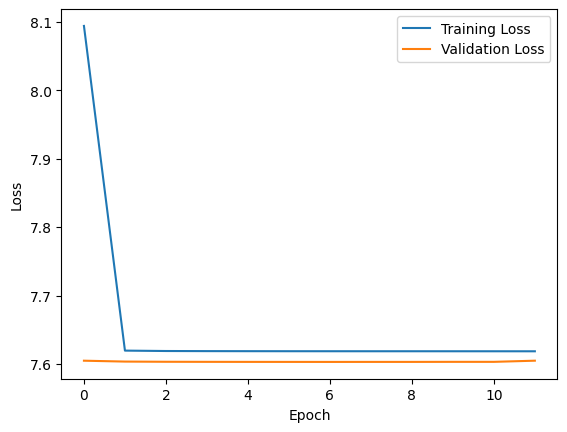

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()